# Overview

Data taken from: https://www.kaggle.com/datasets/marikastewart/employee-

## Metadata
- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
-  "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "bonus" - 1 if the employee received a bonus in the previous 24 months, 0 otherwise.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

In [3]:
## Import all necessary libraries
# ---- General ------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
# ---- Machine Learning ------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, log_loss, classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Initialize random state
r_state = 594


# Data import & prep

In [5]:
print(os.getcwd())

C:\Users\chels\Github\EmployeeTurnover


In [6]:
file_path = 'employee_churn_data.csv'
df = pd.read_csv(file_path)

In [7]:
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [8]:
print(f"Size of dataframe: {df.shape}")
df.info()

Size of dataframe: (9540, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [9]:
for x in df.columns:
    print(f'Value counts for column {x}')
    print(df[x].value_counts())
    print('------------------')

Value counts for column department
department
sales          1883
retail         1541
operations     1522
engineering    1516
marketing       802
support         735
admin           423
finance         402
logistics       360
IT              356
Name: count, dtype: int64
------------------
Value counts for column promoted
promoted
0    9251
1     289
Name: count, dtype: int64
------------------
Value counts for column review
review
0.577569    1
0.719342    1
0.698290    1
0.629649    1
0.620933    1
           ..
0.580446    1
0.615943    1
0.619506    1
0.697879    1
0.626373    1
Name: count, Length: 9540, dtype: int64
------------------
Value counts for column projects
projects
3    5833
4    3058
2     578
5      71
Name: count, dtype: int64
------------------
Value counts for column salary
salary
medium    6611
high      1548
low       1381
Name: count, dtype: int64
------------------
Value counts for column tenure
tenure
6.0     2313
7.0     2209
8.0     1888
5.0     1823
9.0   

## Missing values

In [11]:
df.isnull().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

## Distributions

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [14]:
cat_df = df[['department','promoted','salary','bonus','left']]
numeric_df = df[[x for x in df.columns if x not in cat_df.columns]]

In [15]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   department  9540 non-null   object
 1   promoted    9540 non-null   int64 
 2   salary      9540 non-null   object
 3   bonus       9540 non-null   int64 
 4   left        9540 non-null   object
dtypes: int64(2), object(3)
memory usage: 372.8+ KB


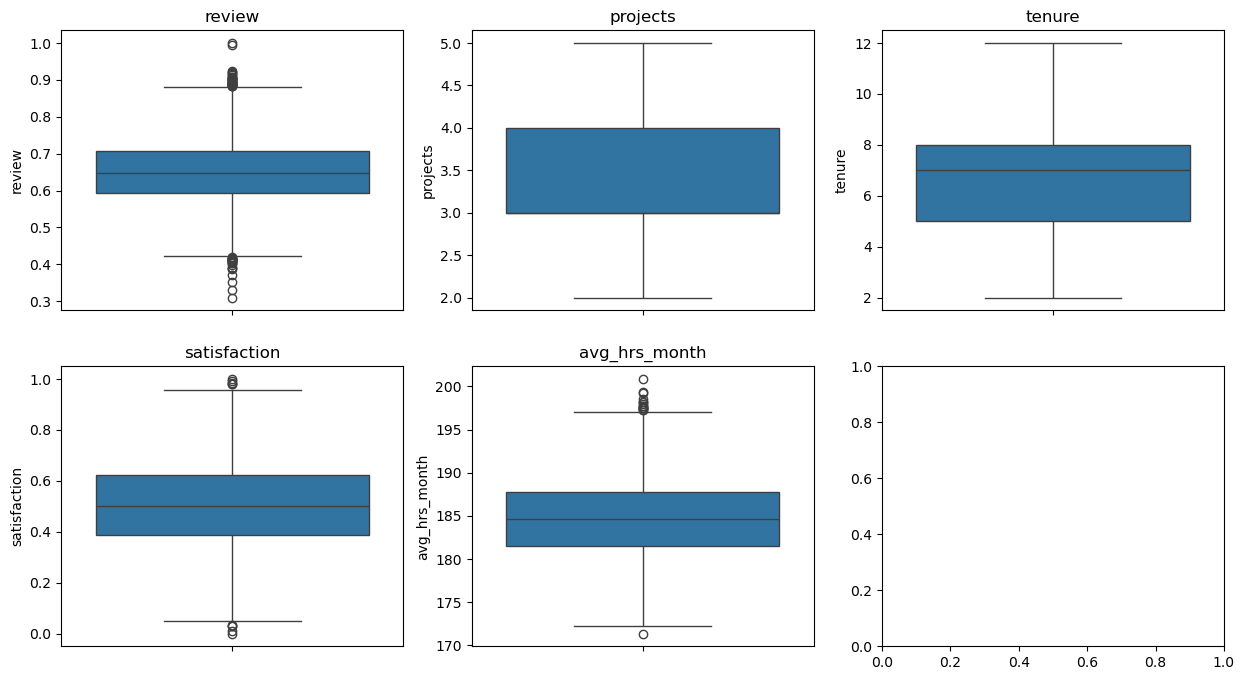

In [16]:
n_numeric = len(numeric_df.columns)

n_subplots = 3
n_rows = math.ceil(n_numeric / n_subplots)

fig, axes = plt.subplots(n_rows, n_subplots, figsize=(5 * n_subplots, 4 * n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(numeric_df.columns):
    ax = axes[i]
    
    sns.boxplot(numeric_df[col], ax=ax)
    
    ax.set_title(col)

C:\Users\chels\AppData\Local\Temp\ipykernel_34620\1233672225.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_df[col].value_counts(normalize=True)*100, ax=ax, palette=palette_color)
C:\Users\chels\AppData\Local\Temp\ipykernel_34620\1233672225.py:15: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=cat_df[col].value_counts(normalize=True)*100, ax=ax, palette=palette_color)
C:\Users\chels\AppData\Local\Temp\ipykernel_34620\1233672225.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_df[col].value_counts(normalize=True)*100, ax=ax, palette=palette_color)
C:\Users\chels\Ap

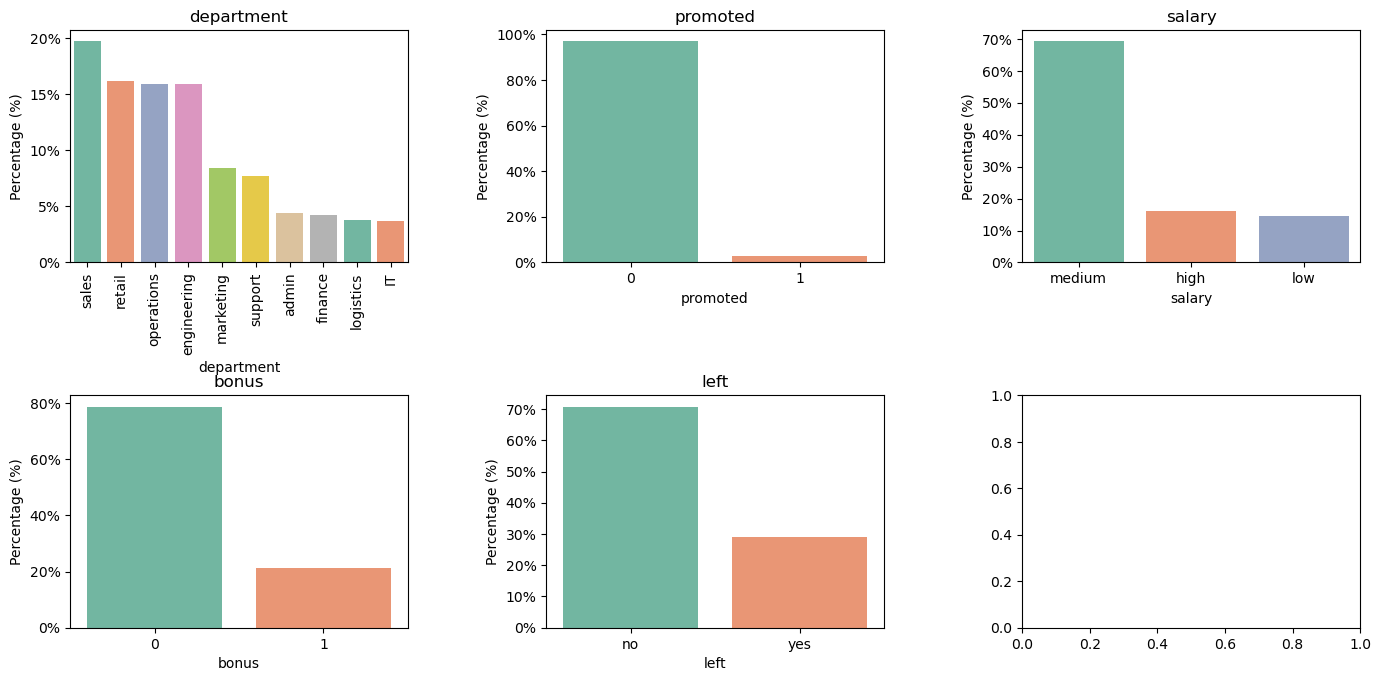

In [17]:
import matplotlib.ticker as mtick

n_cat = len(cat_df.columns)

palette_color = sns.color_palette("Set2")
n_subplots = 3
n_rows = math.ceil(n_cat / n_subplots)

fig, axes = plt.subplots(n_rows, n_subplots, figsize=(5 * n_subplots, 4 * n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(cat_df.columns):
    ax = axes[i]
    
    sns.barplot(data=cat_df[col].value_counts(normalize=True)*100, ax=ax, palette=palette_color)
    
    ax.set_title(col)

    ax.set_ylabel('Percentage (%)')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=0))

fig.tight_layout(pad=5.0)  # Increases padding around subplots overall

axes[0].tick_params(axis='x', rotation=90)


## Group effects

## Adjust data types for categorical columns

In [20]:
## Convert ordinal data to category data type
df.salary = df.salary.astype('category')
df.salary.cat.reorder_categories(['low','medium','high'])
df.salary = df.salary.cat.codes

In [21]:
## Convert target column left to binary representation of classes
df.left = df.left.map({'yes': 1, 'no': 0})

In [22]:
dummy_department = pd.get_dummies(df['department'], drop_first=True, dummy_na=False)
dummy_department

,admin,engineering,finance,logistics,marketing,operations,retail,sales,support
0,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
9535,False,False,False,False,False,True,False,False,False
9536,False,False,False,True,False,False,False,False,False
9537,False,False,False,False,False,True,False,False,False
9538,False,False,False,False,False,False,False,False,False


In [23]:
df2 = pd.concat([df, dummy_department], axis=1)

In [24]:
df2.drop(labels='department', axis=1, inplace=True)
df2.head()

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,admin,engineering,finance,logistics,marketing,operations,retail,sales,support
0,0,0.577569,3,1,5.0,0.626759,0,180.866070,0,False,False,False,False,False,True,False,False,False
1,0,0.751900,3,2,6.0,0.443679,0,182.708149,0,False,False,False,False,False,True,False,False,False
2,0,0.722548,3,2,6.0,0.446823,0,184.416084,0,False,False,False,False,False,False,False,False,True
3,0,0.675158,4,0,8.0,0.440139,0,188.707545,0,False,False,False,True,False,False,False,False,False
4,0,0.676203,3,0,5.0,0.577607,1,179.821083,0,False,False,False,False,False,False,False,True,False


## Correlation matrix

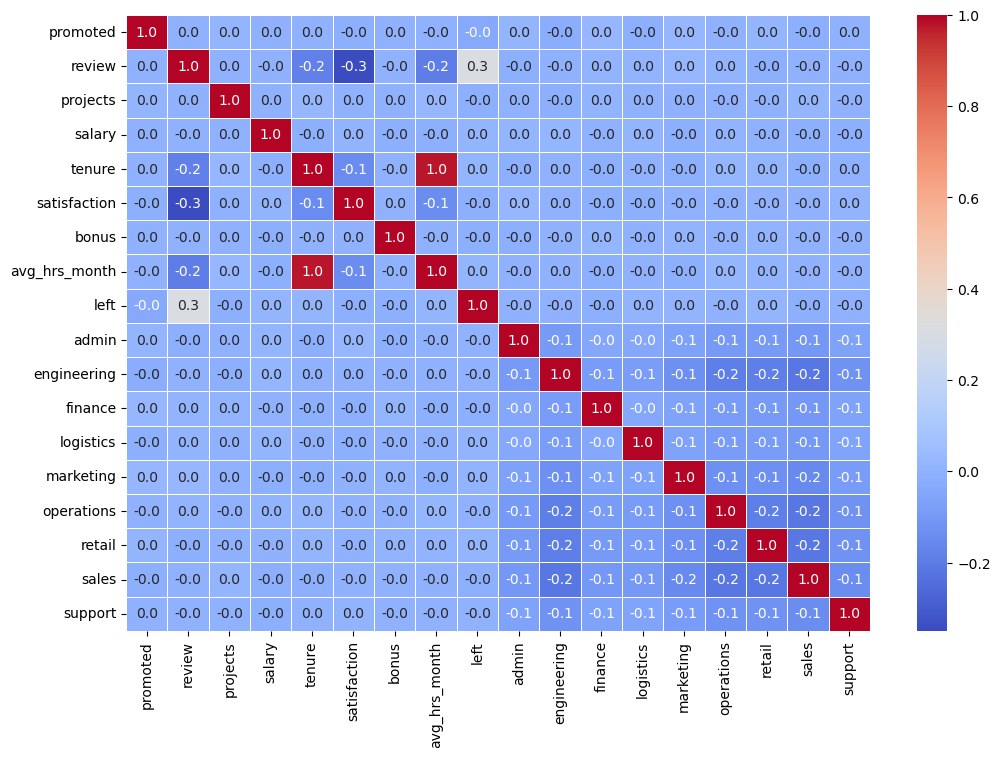

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".1f", linewidth=.5)
plt.show()

## Exploring pairwise relationships

<Axes: xlabel='tenure', ylabel='avg_hrs_month'>

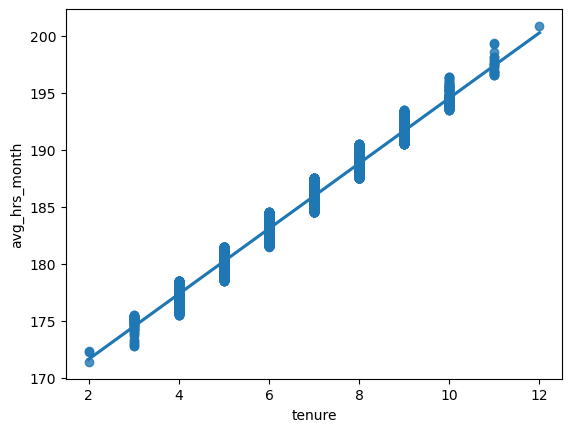

In [28]:
sns.regplot(data=df2, x='tenure', y='avg_hrs_month')

<function seaborn.regression.regplot(data=None, *, x=None, y=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)>

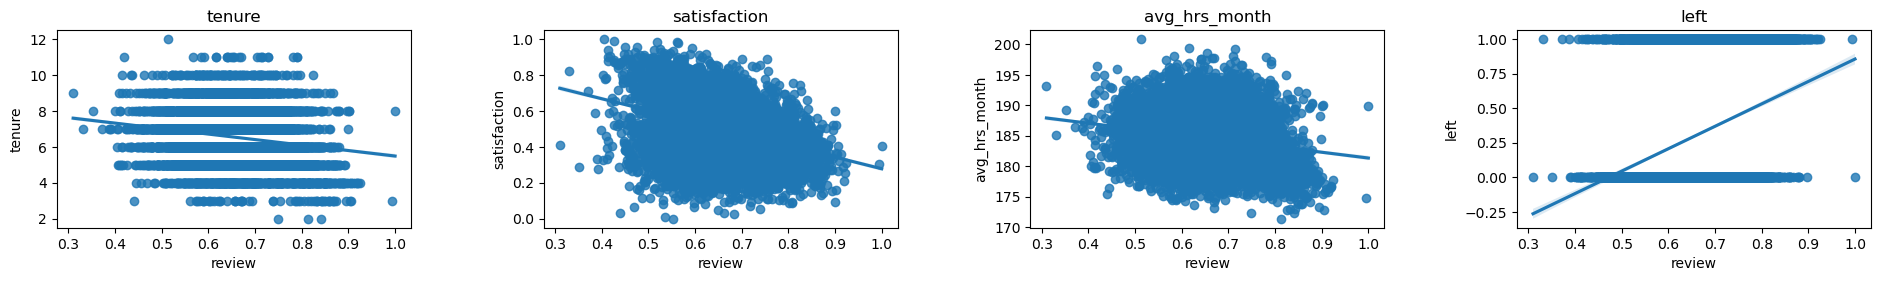

In [29]:
n_subplots = 4
n_rows = 1

fig, axes = plt.subplots(n_rows, n_subplots, figsize=(5 * n_subplots, 4 * n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(df2[['tenure', 'satisfaction', 'avg_hrs_month', 'left']]):
    ax = axes[i]
    
    sns.regplot(data=df2, x='review', y=col, ax=ax)
    
    ax.set_title(col)

fig.tight_layout(pad=5.0)  # Increases padding around subplots overall

sns.regplot

# Build initial decision tree

In [33]:
def output_dt(features, target, test_size):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=test_size, stratify=target)
    dt = DecisionTreeClassifier(random_state = r_state)
    dt.fit(features_train, target_train)
    train_score = dt.score(features_train, target_train)
    test_score = dt.score(features_test, target_test)
    depth = dt.get_depth()
    pred = dt.predict(features_test)
    cm = confusion_matrix(target_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
    disp.plot(cmap=plt.cm.Blues)  # You can change the colormap if you want
    plt.show()
    print(f"Train: {train_score}, Test: {test_score}, Depth: {depth}")
    feature_imp = dict(zip(dt.feature_names_in_,dt.feature_importances_))
    feature_imp_df = pd.DataFrame({
        'feature': list(feature_imp.keys()),
        'importance': list(feature_imp.values())
    })
    return feature_imp_df.sort_values(by='importance', ascending=False)
    
    

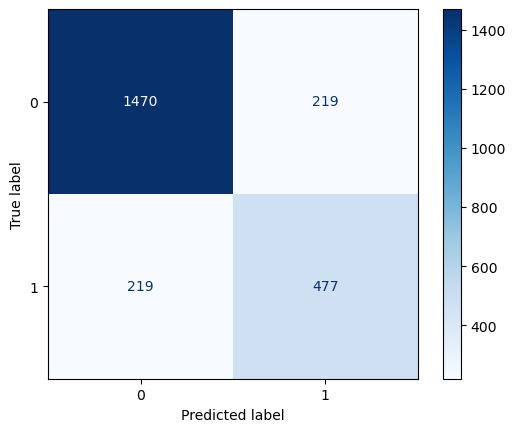

Train: 1.0, Test: 0.8163522012578617, Depth: 23


,feature,importance
7,avg_hrs_month,0.345747
5,satisfaction,0.293820
1,review,0.260603
2,projects,0.015111
6,bonus,0.010705
3,salary,0.010495
14,retail,0.007777
12,marketing,0.007350
9,engineering,0.006966
15,sales,0.006709


In [35]:
output_dt(df2.drop(labels='left', axis=1), df2['left'], 1/4)

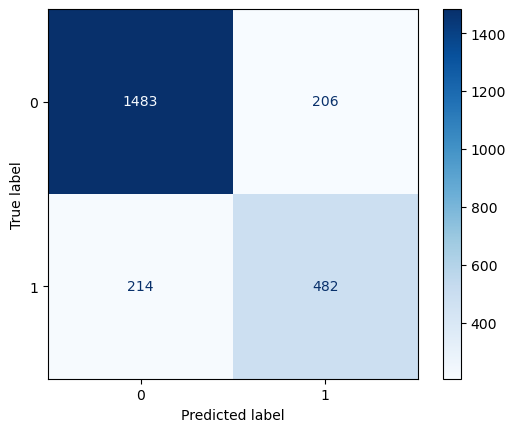

Train: 1.0, Test: 0.8238993710691824, Depth: 33


,feature,importance
5,satisfaction,0.333714
7,avg_hrs_month,0.332440
1,review,0.277567
3,salary,0.022313
2,projects,0.016193
6,bonus,0.011560
4,tenure,0.003208
0,promoted,0.003005


In [37]:
features2 = df2[['promoted', 'review', 'projects', 'salary', 'tenure',
       'satisfaction', 'bonus', 'avg_hrs_month']]
target2 = df2['left']

output_dt(features2, target2, 1/4)

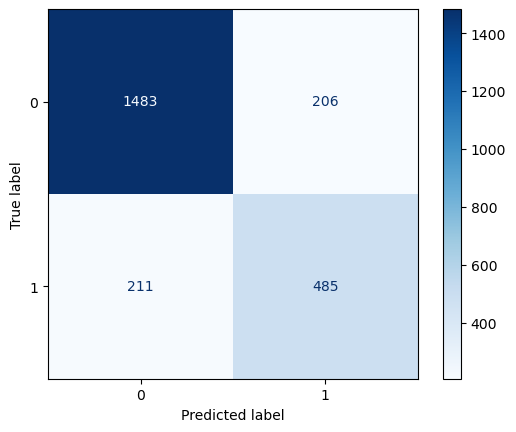

Train: 1.0, Test: 0.8251572327044026, Depth: 22


,feature,importance
0,avg_hrs_month,0.373661
1,satisfaction,0.334342
2,review,0.291997


In [39]:
output_dt(df2[['avg_hrs_month','satisfaction','review']], df2['left'], 1/4)

# Build initial logistic regression

# Fine tune models

## Decision tree tuning

### Run cross validation

### Use hyperparameter tuning